In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting


In [2]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 8,
 '02_l': 0,
 '03_fist': 9,
 '04_fist_moved': 1,
 '05_thumb': 7,
 '06_index': 4,
 '07_ok': 6,
 '08_palm_moved': 5,
 '09_c': 2,
 '10_down': 3}

In [3]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

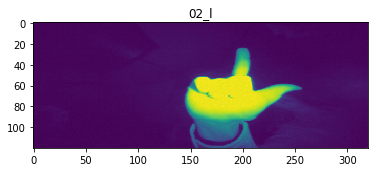

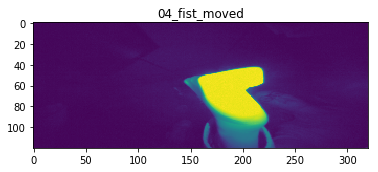

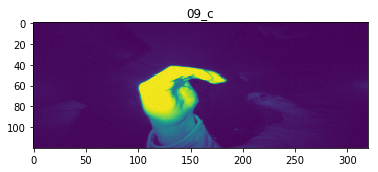

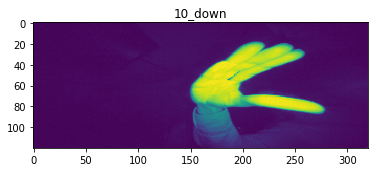

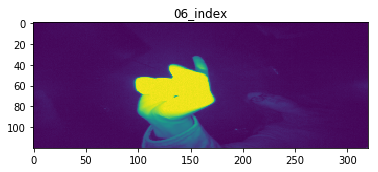

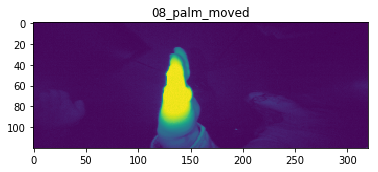

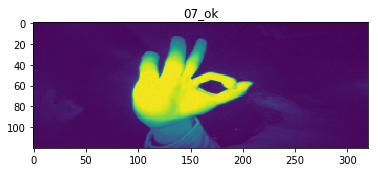

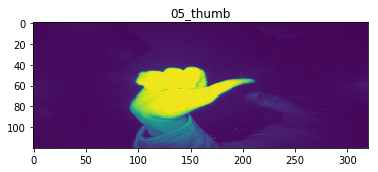

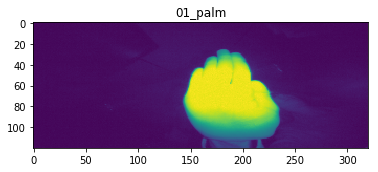

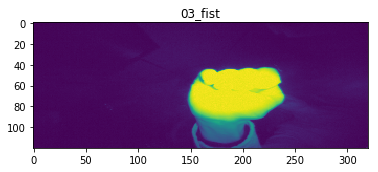

In [4]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [8]:
from keras import layers
from keras import models

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Finally, we fit the model.

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 15s 937us/step - loss: 0.2732 - acc: 0.9127 - val_loss: 0.0165 - val_acc: 0.9965
Epoch 2/10
16000/16000 [==============================] - 5s 319us/step - loss: 0.0182 - acc: 0.9956 - val_loss: 0.0180 - val_acc: 0.9945
Epoch 3/10
16000/16000 [==============================] - 5s 320us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 5.0219e-04 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 5s 318us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0015 - val_acc: 0.9990
Epoch 5/10
16000/16000 [==============================] - 5s 326us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.0030 - val_acc: 0.9990
Epoch 6/10
16000/16000 [==============================] - 5s 321us/step - loss: 0.0055 - acc: 0.9993 - val_loss: 2.6906e-05 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 5s 324us/step - loss: 0.0028 - acc: 0.9996 - val_loss: 0

In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 0s 153us/step
Accuracy:1.0
